In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, Y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0 #normalize input
x_test = x_test.astype("float32") / 255.0

model = keras.Sequential()
model.add(keras.Input(shape=(None, 28)))
model.add(
    layers.SimpleRNN(256, return_sequences=True, activation = 'relu') #return sequences outputs one for each cell, instead of one culuative values
)
model.add(layers.SimpleRNN(256, activation='relu')) #default activation is tanh
model.add(layers.Dense(10))

print(model.summary())

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

model.fit(x_train, y_train, batch_size=64, epochs=3, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

Epoch 1/3
1875/1875 [==============================] - 32s 16ms/step - loss: 1.9550 - accuracy: 0.2487 - val_loss: 1.2378 - val_accuracy: 0.5077
Epoch 2/3
1875/1875 [==============================] - 30s 16ms/step - loss: 1.3958 - accuracy: 0.4609 - val_loss: 0.9556 - val_accuracy: 0.6675
Epoch 3/3
1875/1875 [==============================] - 31s 16ms/step - loss: 1.2418 - accuracy: 0.5437 - val_loss: 0.8159 - val_accuracy: 0.7709


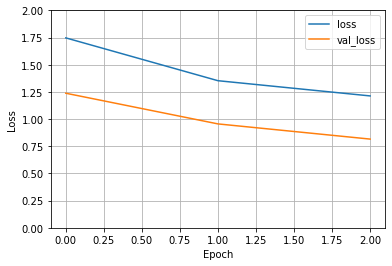

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import pandas as pd
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0 #normalize input
x_test = x_test.astype("float32") / 255.0

model = Sequential()

model.add(LSTM(16, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))
 
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test,y_test))

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 2])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c58af11-5d4f-40f3-a808-e868f2c28485' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>